# Описание задачи

### Общие сведения

Подавляющее большинство звёзд может быть отнесено к одному из основных классов: O, B, A, F, G, K, M. В таком порядке эти классы образуют непрерывную последовательность по уменьшению эффективной температуры звезды и по цвету — от голубых к красным.Кроме основных спектральных классов существуют и другие для звёзд. Это, например, классы L, T, Y для коричневых карликов или C, S для углеродных звёзд и циркониевых звёзд. Для звёзд Вольфа — Райе используют класс W, для планетарных туманностей — P, для новых звёзд — Q. Каждый из этих классов, в свою очередь, делится на подклассы от 0 до 9 в порядке уменьшения температуры. Звёзды, относящиеся к одному спектральному классу, могут иметь сильно различающиеся светимости и абсолютные звёздные величины, поэтому для описания свойств звезды одного спектрального класса недостаточно. Классы светимости обозначаются римскими цифрами, которые ставятся после спектрального класса. 
Основные классы светимости в порядке уменьшения светимости:

    I — сверхгиганты
    II — яркие гиганты
    III — гиганты
    IV — субгиганты
    V — звёзды главной последовательности (карлики)
    VI — субкарлики
    VII — белые карлики

В редких случаях выделяют класс светимости VIII, к которому принадлежат ядра планетарных туманностей, превращающиеся в белые карлики

### Задача

Дана табилца, в которой указаны видимая звёздная величина (Visual Apparent Magnitude), дистанция (Distance), ошибка в измерении дистанции (Distance Error), показатель цвета B-V (BV), классификация звезды (Spectral Type). Необходимо по известным данным о звезде показать к какому классу светимости она относится.



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Читаем данные

In [2]:
url="https://raw.githubusercontent.com/BBzhenya/MachineLearning/main/StarClassification.csv"
data_raw=pd.read_csv(url)
data_raw

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Type
0,7.42,2.59,0.54,0.0,B6Vne
1,7.39,3.61,0.54,0.0,NaN
2,7.16,6.87,0.57,0.0,A0V
3,6.48,3.92,0.63,0.0,B7V
4,7.16,8.10,0.64,0.0,A0V
...,...,...,...,...,...
99991,9.84,NaN,NaN,NaN,NaN
99992,9.87,NaN,NaN,NaN,NaN
99993,9.90,NaN,NaN,NaN,NaN
99994,9.95,NaN,NaN,NaN,NaN


Последний столбец строится из трёх значений: спектральный класс, спектральный подкласс, класс светимости. Добавим в таблицу три новых столбца, каждый из которых соответсвует одному из этих значений, а этот удалим.

In [3]:
spectral_class=[]
spectral_subclass=[]
luminosity_class=[]

Во время разделения необходимо проверять является ли ячейка таблицы типом NaN. Если да, то ячейка заполняется пустой строкой.

In [4]:
import re

counter=0
while counter<data_raw.shape[0]:
    if pd.notna(data_raw.iat[counter,4]):
        temp1=re.findall(r'[A-Z]', str(data_raw.iat[counter,4]))
        temp2=re.findall(r'[0-9]+', str(data_raw.iat[counter,4]))
        temp3=re.findall(r'[A-Z]+', str(data_raw.iat[counter,4]))
        if len(temp1)!=0:
            spectral_class.append(temp1[0])
        else:
            spectral_class.append('')
        if len(temp2)!=0:
            spectral_subclass.append(temp2[0])
        else:
            spectral_subclass.append('')
        if len(temp3)>1:
            luminosity_class.append(temp3[1])
        else:
            luminosity_class.append('')           
    else:
        spectral_class.append('')
        spectral_subclass.append('')
        luminosity_class.append('')
    counter+=1

In [5]:
data_raw['Spectral Class']=spectral_class
data_raw['Spectral Subclass']=spectral_subclass
data_raw['Luminosity Class']=luminosity_class
del data_raw['Spectral Type']
data_raw

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.0,B,6,V
1,7.39,3.61,0.54,0.0,,,
2,7.16,6.87,0.57,0.0,A,0,V
3,6.48,3.92,0.63,0.0,B,7,V
4,7.16,8.10,0.64,0.0,A,0,V
...,...,...,...,...,...,...,...
99991,9.84,NaN,NaN,NaN,,,
99992,9.87,NaN,NaN,NaN,,,
99993,9.90,NaN,NaN,NaN,,,
99994,9.95,NaN,NaN,NaN,,,


Столбцы Spectral Class, Spectral Subclass и Luminosity Class содержат категориальные значения. Они имеют тип 'Object'. Заменим на новый тип, который будет хранить категориальные значения. 

In [6]:
data_raw['Spectral Class']

0        B
1         
2        A
3        B
4        A
        ..
99991     
99992     
99993     
99994     
99995     
Name: Spectral Class, Length: 99996, dtype: object

In [7]:
data_raw['Spectral Subclass']

0        6
1         
2        0
3        7
4        0
        ..
99991     
99992     
99993     
99994     
99995     
Name: Spectral Subclass, Length: 99996, dtype: object

In [8]:
data_raw['Luminosity Class']

0        V
1         
2        V
3        V
4        V
        ..
99991     
99992     
99993     
99994     
99995     
Name: Luminosity Class, Length: 99996, dtype: object

In [9]:
data_raw['Spectral Class']=data_raw['Spectral Class'].astype('category')

In [10]:
data_raw['Spectral Class'].dtype

CategoricalDtype(categories=['', 'A', 'B', 'C', 'D', 'F', 'G', 'K', 'M', 'N', 'O', 'R',
                  'S', 'W'],
, ordered=False)

In [11]:
data_raw['Spectral Subclass']=data_raw['Spectral Subclass'].astype('category')

In [12]:
data_raw['Spectral Subclass'].dtype

CategoricalDtype(categories=['', '0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

Можем увидеть класс '10'. Это ошибка в данных, так как классы могут быть от '0' до '9'. Удалим это значение.

In [13]:
counter=0
while counter<data_raw.shape[0]:
    if data_raw.iat[counter,5]=='10':
        data_raw.iat[counter,5]=''
    counter+=1

In [14]:
data_raw['Luminosity Class']=data_raw['Luminosity Class'].astype('category')

In [15]:
data_raw['Luminosity Class'].dtype

CategoricalDtype(categories=['', 'I', 'II', 'III', 'IV', 'V', 'VII'], ordered=False)

# Вычисление основных характеристик и визуализация данных

Построим диаграммы рассеивания, чтобы посмотреть, как искомые классы зависят от расстояния.  

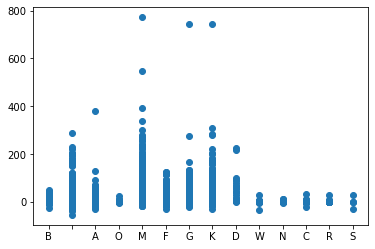

In [16]:
plt.scatter(data_raw['Spectral Class'], data_raw['Distance'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

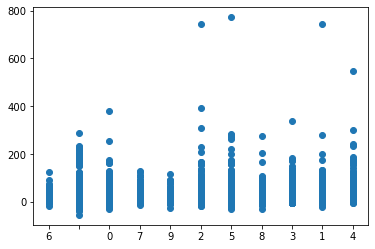

In [17]:
plt.scatter(data_raw['Spectral Subclass'], data_raw['Distance'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

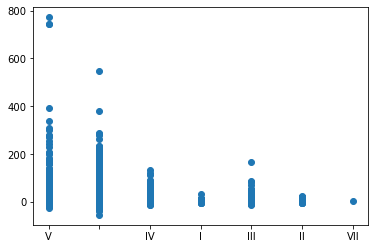

In [18]:
plt.scatter(data_raw['Luminosity Class'], data_raw['Distance'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

Видно, что некоторые точки выделяются. Они указывают на очень большое расстояние. Найдём квантили для признака Distance.

In [19]:
data_raw['Distance'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    -2.66175
0.010    -1.54000
0.050     0.54000
0.100     1.20000
0.500     4.67000
0.900    15.15000
0.950    21.72750
0.990    45.36050
0.995    61.45875
Name: Distance, dtype: float64

Удалим все строки в таблице, в которых 'Distance' выходит за пределы кватилей 0.005 и 0.095

In [20]:
data = data_raw[
    (data_raw['Distance'] >= data_raw['Distance'].quantile(0.005)) &
    (data_raw['Distance'] <= data_raw['Distance'].quantile(0.995))]
data.shape

(98768, 7)

In [21]:
data

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.0,B,6,V
1,7.39,3.61,0.54,0.0,,,
2,7.16,6.87,0.57,0.0,A,0,V
3,6.48,3.92,0.63,0.0,B,7,V
4,7.16,8.10,0.64,0.0,A,0,V
...,...,...,...,...,...,...,...
99867,12.86,11.28,9.63,NaN,,,
99868,10.93,23.66,9.70,NaN,,,
99869,9.27,0.61,9.73,NaN,,,
99870,10.40,15.12,9.78,NaN,,,


Проиллюстрируем обновлённые данные.

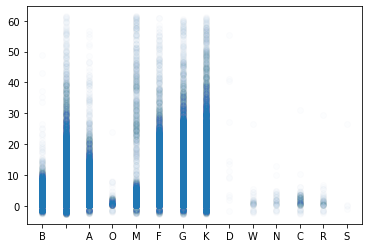

In [22]:
plt.scatter(data['Spectral Class'], data['Distance'], alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

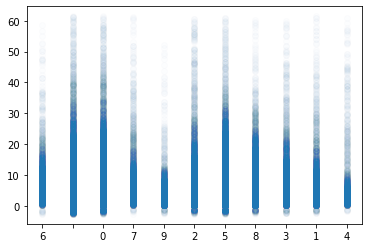

In [23]:
plt.scatter(data['Spectral Subclass'], data['Distance'],alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

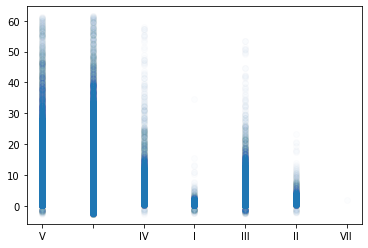

In [24]:
plt.scatter(data['Luminosity Class'], data['Distance'], alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

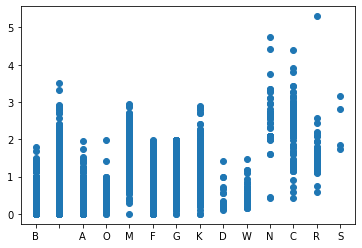

In [25]:
plt.scatter(data_raw['Spectral Class'], data_raw['BV'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

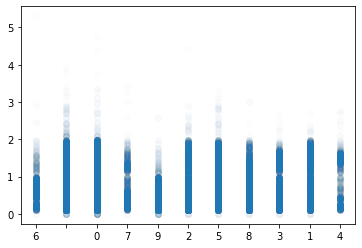

In [26]:
plt.scatter(data['Spectral Subclass'], data['BV'],alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

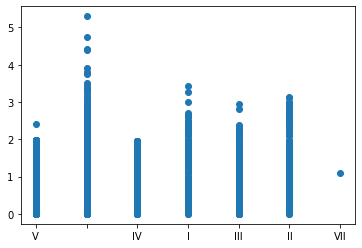

In [27]:
plt.scatter(data_raw['Luminosity Class'], data_raw['BV'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

Во время разбиения столбца Spectral Type на Spectral Class, Spectral Subclass и Luminosity Class мы уже учитывали пропущенные значения и заменяли их пустой строкой. Присвоим им тип NaN.

In [28]:
counter=0
while counter<data.shape[0]:
    if data.iat[counter,4]=="":
        data.iat[counter,4]=np.NaN
    if data.iat[counter,5]=="":
        data.iat[counter,5]=np.NaN
    if data.iat[counter,6]=="":
        data.iat[counter,6]=np.NaN
    counter+=1

In [29]:
data.describe()

,Visual Apparent Magnitude,Distance,Distance Error,BV
count,98768.000000,98768.000000,98768.000000,88743.000000
mean,8.394359,6.845557,1.370176,0.797659
std,1.297055,7.266516,1.426724,0.480279
min,0.180000,-2.660000,0.380000,0.000000
25%,7.660000,2.570000,0.880000,0.428000
50%,8.480000,4.670000,1.180000,0.660000
75%,9.200000,8.410000,1.500000,1.180000
max,13.610000,61.450000,114.460000,5.300000


In [30]:
data.describe(include=['category'])

,Spectral Class,Spectral Subclass,Luminosity Class
count,84792,82591,36468
unique,13,10,6
top,K,0,V
freq,23822,25207,17887


In [31]:
data['Spectral Class'].value_counts() 

K    23822
F    19303
G    16754
A    13819
B     7415
M     3194
O      184
C      129
R       64
N       46
W       45
D       13
S        4
         0
Name: Spectral Class, dtype: int64

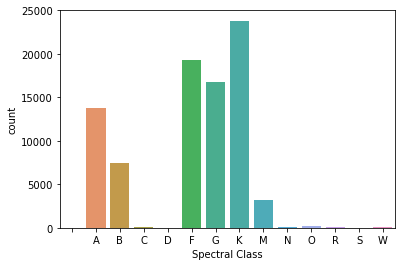

In [32]:
sns.countplot(x='Spectral Class', data=data)
pass

In [33]:
data['Spectral Subclass'].value_counts() 

0     25207
5     16643
2     12029
8      9012
3      5834
1      4237
9      3782
6      2182
7      2056
4      1609
          0
10        0
Name: Spectral Subclass, dtype: int64

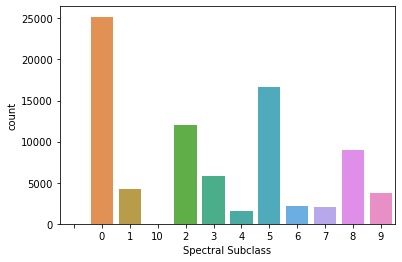

In [34]:
sns.countplot(x='Spectral Subclass', data=data)
pass

In [35]:
data['Luminosity Class'].value_counts() 

V      17887
III    13948
IV      3179
II       809
I        644
VII        1
           0
Name: Luminosity Class, dtype: int64

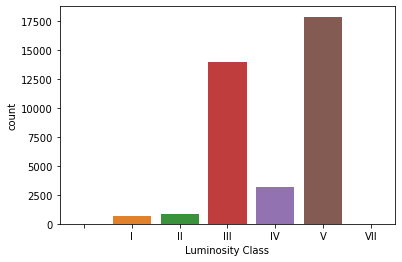

In [36]:
sns.countplot(x='Luminosity Class', data=data) 
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных.

In [37]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

No handles with labels found to put in legend.


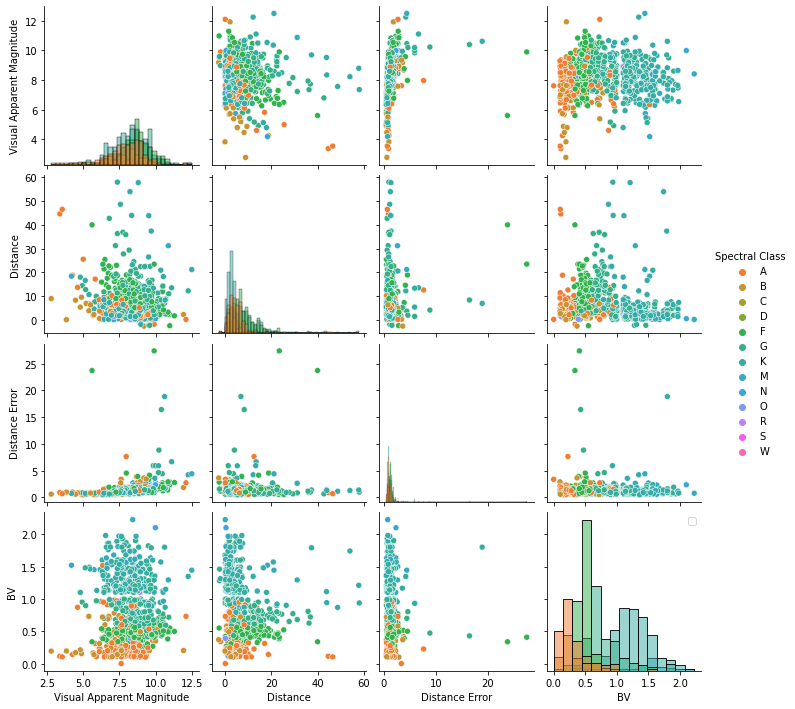

In [38]:
sns.pairplot(data.iloc[random_subset], hue='Spectral Class', diag_kind='hist')
plt.legend()
pass

Можно заметить, что спектальный класс (Spectral Class) зависит от показателя цвета B-V (BV) и от дистанции (Distance).

No handles with labels found to put in legend.


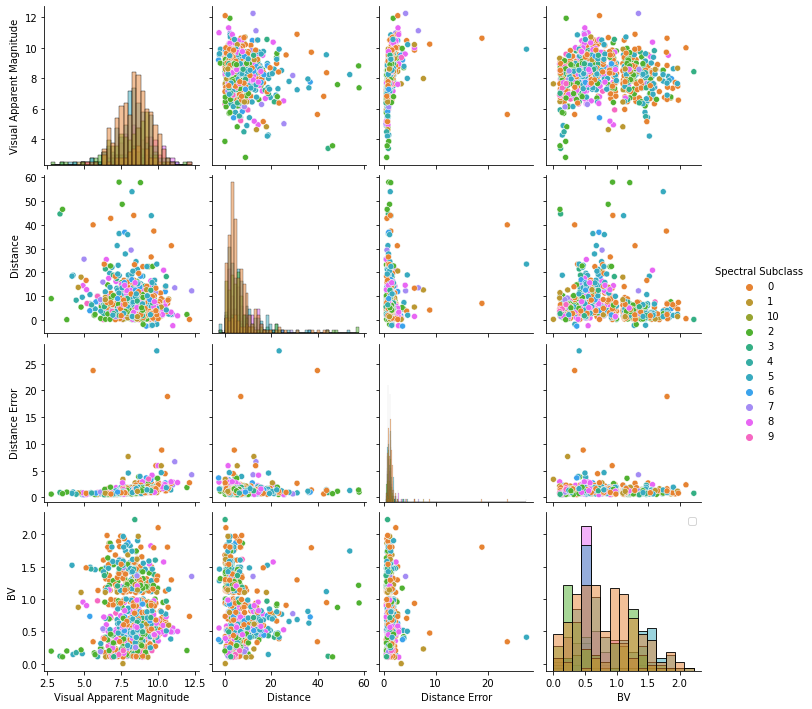

In [39]:
sns.pairplot(data.iloc[random_subset], hue='Spectral Subclass', diag_kind='hist')
plt.legend()
pass

No handles with labels found to put in legend.


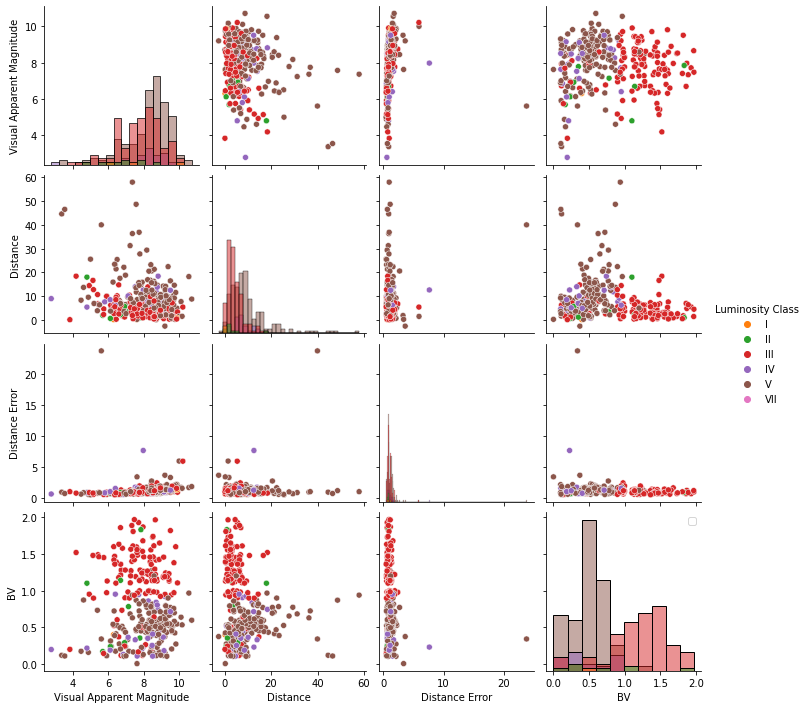

In [40]:
sns.pairplot(data.iloc[random_subset], hue='Luminosity Class', diag_kind='hist')
plt.legend()
pass

По графикам видно, что класс светимости (Luminosity Class) зависит от показателя B-V (BV).

Посчитаем матрицу корреляции.

In [41]:
corr_mat = data.corr()
corr_mat

,Visual Apparent Magnitude,Distance,Distance Error,BV
Visual Apparent Magnitude,1.000000,-0.076914,0.349226,0.000173
Distance,-0.076914,1.000000,0.114443,-0.088370
Distance Error,0.349226,0.114443,1.000000,0.000591
BV,0.000173,-0.088370,0.000591,1.000000


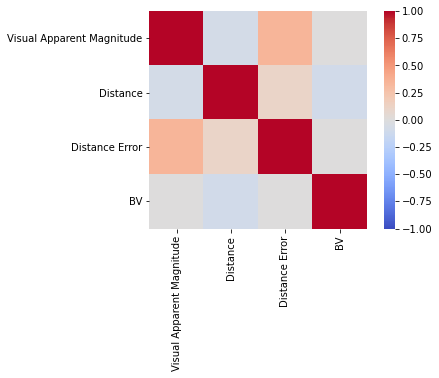

In [42]:
sns.heatmap(corr_mat, square=True,vmin=-1,vmax=1, cmap='coolwarm')
pass

Можно заметить, что между признаками нет зависимостей.

# Обработка пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [43]:
data.isna().sum()

Visual Apparent Magnitude        0
Distance                         0
Distance Error                   0
BV                           10025
Spectral Class               13976
Spectral Subclass            16177
Luminosity Class             62300
dtype: int64

Luminosity Class является искомым классом. Видно, что в нём больше всего пропущенных значений. Предлагаю удалить строки таблицы данных, где у Luminosity Class пропущены значения, так как какое-либо заполнение может привести к дальнейшим неточностям в определнии класса.

In [44]:
data.reset_index(drop=True, inplace=True)

In [45]:
counter=0
index=0
while counter<data.shape[0]:
    if pd.isna(data.iat[counter,6]):
        data=data.drop(index=index,axis=0)     
    else:
        counter=counter+1
    index=index+1

In [46]:
data

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.0,B,6,V
2,7.16,6.87,0.57,0.0,A,0,V
3,6.48,3.92,0.63,0.0,B,7,V
4,7.16,8.10,0.64,0.0,A,0,V
6,7.83,4.58,0.68,0.0,B,9,IV
...,...,...,...,...,...,...,...
98652,10.20,5.41,5.90,NaN,K,1,III
98655,9.99,1.48,5.92,NaN,G,8,V
98658,9.10,11.98,5.96,NaN,K,1,V
98685,8.99,7.39,6.57,NaN,F,2,V


In [47]:
data.isna().sum()

Visual Apparent Magnitude       0
Distance                        0
Distance Error                  0
BV                           3474
Spectral Class                  0
Spectral Subclass               2
Luminosity Class                0
dtype: int64

Заполним медианами пропущенные значения столбце BV.

In [48]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

Заполним модами пропущенные значения в столбцах Spectral Subclass.

In [49]:
data['Spectral Subclass'].fillna(data['Spectral Subclass'].mode().iloc[0], inplace=True)

In [50]:
data.isna().sum()

Visual Apparent Magnitude    0
Distance                     0
Distance Error               0
BV                           0
Spectral Class               0
Spectral Subclass            0
Luminosity Class             0
dtype: int64

In [51]:
data.describe()

,Visual Apparent Magnitude,Distance,Distance Error,BV
count,36468.000000,36468.000000,36468.000000,36468.000000
mean,7.973121,7.411058,1.154818,0.786931
std,1.312667,7.860117,0.712484,0.462219
min,0.180000,-2.600000,0.380000,0.000000
25%,7.260000,2.700000,0.800000,0.453000
50%,8.240000,4.950000,0.990000,0.665000
75%,8.850000,9.200000,1.340000,1.141000
max,12.560000,61.300000,30.290000,3.430000


In [52]:
data.describe(include=['category'])

,Spectral Class,Spectral Subclass,Luminosity Class
count,36468,36468,36468
unique,8,10,6
top,K,0,V
freq,10344,7176,17887


# Обработка категориальных признаков

In [53]:
data['Spectral Class'].value_counts() 

K    10344
F     7727
G     7043
B     4934
A     4829
M     1449
O       97
C       45
         0
D        0
N        0
R        0
S        0
W        0
Name: Spectral Class, dtype: int64

In [54]:
data['Spectral Subclass'].value_counts() 

0     7176
2     4835
3     4647
5     4198
8     4114
1     3986
9     2426
6     2021
7     1626
4     1439
         0
10       0
Name: Spectral Subclass, dtype: int64

In [55]:
data['Luminosity Class'].value_counts() 

V      17887
III    13948
IV      3179
II       809
I        644
VII        1
           0
Name: Luminosity Class, dtype: int64

Для начала обработаем категориальный признак 'Spectral Class'.

In [56]:
SpectralClass_dummies=pd.get_dummies(data['Spectral Class'])
SpectralClass_dummies.head()

,,A,B,C,D,F,G,K,M,N,O,R,S,W
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
data = pd.concat((data, SpectralClass_dummies), axis=1)     
data = data.drop(['Spectral Class'], axis=1)

Обработаем категориальный признак 'Spectral Subclass'.

In [58]:
SpectralSubclass_dummies=pd.get_dummies(data['Spectral Subclass'])
SpectralSubclass_dummies.head()

,,0,1,10,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
data = pd.concat((data, SpectralSubclass_dummies), axis=1)     
data = data.drop(['Spectral Subclass'], axis=1)   

Обработаем категориальный признак 'Luminosity Class'

Присвоим каждому классу собственный номер

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
label_encoder=LabelEncoder()

In [62]:
luminosity_class_code = label_encoder.fit_transform(data['Luminosity Class'])

In [63]:
luminosity_class=data['Luminosity Class']

In [64]:
data['Luminosity Class']=luminosity_class_code

In [65]:
data

,Visual Apparent Magnitude,Distance,Distance Error,BV,Luminosity Class,,A,B,C,D,...,1,10,2,3,4,5,6,7,8,9
0,7.42,2.59,0.54,0.000,4,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7.16,6.87,0.57,0.000,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.48,3.92,0.63,0.000,4,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7.16,8.10,0.64,0.000,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7.83,4.58,0.68,0.000,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98652,10.20,5.41,5.90,0.665,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
98655,9.99,1.48,5.92,0.665,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98658,9.10,11.98,5.96,0.665,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
98685,8.99,7.39,6.57,0.665,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Удалим безымянные столбцы (они остались после разделения Spectral Type на три новых класса) и столбец '10' (мы удаляли данные значения из таблицы, так как это ошибка).

In [66]:
del data['']
del data['10']

Удалим столбцы D, N, R, S, W, так как представители этих спектральных классов отсутствуют в наших данных

In [67]:
del data['D']
del data['N']
del data['R']
del data['S']
del data['W']

In [68]:
data.head()

,Visual Apparent Magnitude,Distance,Distance Error,BV,Luminosity Class,A,B,C,F,G,...,0,1,2,3,4,5,6,7,8,9
0,7.42,2.59,0.54,0.0,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7.16,6.87,0.57,0.0,4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6.48,3.92,0.63,0.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7.16,8.10,0.64,0.0,4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7.83,4.58,0.68,0.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Проведение нормализации

In [69]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0) 

In [70]:
data_stand.describe()

,Visual Apparent Magnitude,Distance,Distance Error,BV,Luminosity Class,A,B,C,F,G,...,0,1,2,3,4,5,6,7,8,9
count,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,...,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04,3.646800e+04
mean,1.557892e-15,-3.880499e-15,-8.314556e-15,-1.958935e-13,2.078115e-14,-1.223164e-13,-4.771468e-14,1.951187e-14,-2.893936e-14,8.083637e-14,...,-8.761200e-15,-1.807552e-14,3.415839e-15,-1.272568e-14,3.775993e-15,1.562594e-14,-1.867069e-14,2.520758e-14,1.889723e-14,7.187383e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.936862e+00,-1.273653e+00,-1.087488e+00,-1.702506e+00,-2.844037e+00,-3.906711e-01,-3.955525e-01,-3.514896e-02,-5.184998e-01,-4.892318e-01,...,-4.949493e-01,-3.503009e-01,-3.909508e-01,-3.821409e-01,-2.026798e-01,-3.606748e-01,-2.422153e-01,-2.160244e-01,-3.565843e-01,-2.669512e-01
25%,-5.432612e-01,-5.993624e-01,-4.980010e-01,-7.224509e-01,-9.547645e-01,-3.906711e-01,-3.955525e-01,-3.514896e-02,-5.184998e-01,-4.892318e-01,...,-4.949493e-01,-3.503009e-01,-3.909508e-01,-3.821409e-01,-2.026798e-01,-3.606748e-01,-2.422153e-01,-2.160244e-01,-3.565843e-01,-2.669512e-01
50%,2.033107e-01,-3.131071e-01,-2.313283e-01,-2.637938e-01,-1.012813e-02,-3.906711e-01,-3.955525e-01,-3.514896e-02,-5.184998e-01,-4.892318e-01,...,-4.949493e-01,-3.503009e-01,-3.909508e-01,-3.821409e-01,-2.026798e-01,-3.606748e-01,-2.422153e-01,-2.160244e-01,-3.565843e-01,-2.669512e-01
75%,6.680136e-01,2.275973e-01,2.599110e-01,7.660211e-01,9.345082e-01,-3.906711e-01,-3.955525e-01,-3.514896e-02,-5.184998e-01,-4.892318e-01,...,-4.949493e-01,-3.503009e-01,-3.909508e-01,-3.821409e-01,-2.026798e-01,-3.606748e-01,-2.422153e-01,-2.160244e-01,-3.565843e-01,-2.669512e-01
max,3.494322e+00,6.855997e+00,4.089242e+01,5.718219e+00,1.879145e+00,2.559628e+00,2.528040e+00,2.844957e+01,1.928588e+00,2.043965e+00,...,2.020353e+00,2.854610e+00,2.557797e+00,2.616764e+00,4.933754e+00,2.772505e+00,4.128446e+00,4.628980e+00,2.804309e+00,3.745900e+00


In [71]:
data_stand

,Visual Apparent Magnitude,Distance,Distance Error,BV,Luminosity Class,A,B,C,F,G,...,0,1,2,3,4,5,6,7,8,9
0,-0.421372,-0.613357,-0.862922,-1.702506,0.934508,-0.390671,2.528040,-0.035149,-0.518500,-0.489232,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,4.128446,-0.216024,-0.356584,-0.266951
2,-0.619442,-0.068836,-0.820815,-1.702506,0.934508,2.559628,-0.395552,-0.035149,-0.518500,-0.489232,...,2.020353,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
3,-1.137471,-0.444148,-0.736603,-1.702506,0.934508,-0.390671,2.528040,-0.035149,-0.518500,-0.489232,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,4.628980,-0.356584,-0.266951
4,-0.619442,0.087650,-0.722568,-1.702506,0.934508,2.559628,-0.395552,-0.035149,-0.518500,-0.489232,...,2.020353,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
6,-0.109031,-0.360180,-0.666426,-1.702506,-0.010128,-0.390671,2.528040,-0.035149,-0.518500,-0.489232,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,3.745900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98652,1.696455,-0.254584,6.660057,-0.263794,-0.954765,-0.390671,-0.395552,-0.035149,-0.518500,-0.489232,...,-0.494949,2.854610,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
98655,1.536475,-0.754576,6.688128,-0.263794,0.934508,-0.390671,-0.395552,-0.035149,-0.518500,2.043965,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,2.804309,-0.266951
98658,0.858466,0.581282,6.744269,-0.263794,0.934508,-0.390671,-0.395552,-0.035149,-0.518500,-0.489232,...,-0.494949,2.854610,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
98685,0.774667,-0.002679,7.600429,-0.263794,0.934508,-0.390671,-0.395552,-0.035149,1.928588,-0.489232,...,-0.494949,-0.350301,2.557797,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951


# Разбиение данных на обучающую и тестовую выборки

Для предсказания класса светимости будем использовать все признаки кроме 'Distance Error'.

In [72]:
X = data_stand.drop(['Luminosity Class','Distance Error'], axis=1)
y = data['Luminosity Class']

In [73]:
X

,Visual Apparent Magnitude,Distance,BV,A,B,C,F,G,K,M,...,0,1,2,3,4,5,6,7,8,9
0,-0.421372,-0.613357,-1.702506,-0.390671,2.528040,-0.035149,-0.518500,-0.489232,-0.629243,-0.203412,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,4.128446,-0.216024,-0.356584,-0.266951
2,-0.619442,-0.068836,-1.702506,2.559628,-0.395552,-0.035149,-0.518500,-0.489232,-0.629243,-0.203412,...,2.020353,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
3,-1.137471,-0.444148,-1.702506,-0.390671,2.528040,-0.035149,-0.518500,-0.489232,-0.629243,-0.203412,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,4.628980,-0.356584,-0.266951
4,-0.619442,0.087650,-1.702506,2.559628,-0.395552,-0.035149,-0.518500,-0.489232,-0.629243,-0.203412,...,2.020353,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
6,-0.109031,-0.360180,-1.702506,-0.390671,2.528040,-0.035149,-0.518500,-0.489232,-0.629243,-0.203412,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,3.745900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98652,1.696455,-0.254584,-0.263794,-0.390671,-0.395552,-0.035149,-0.518500,-0.489232,1.589167,-0.203412,...,-0.494949,2.854610,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
98655,1.536475,-0.754576,-0.263794,-0.390671,-0.395552,-0.035149,-0.518500,2.043965,-0.629243,-0.203412,...,-0.494949,-0.350301,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,2.804309,-0.266951
98658,0.858466,0.581282,-0.263794,-0.390671,-0.395552,-0.035149,-0.518500,-0.489232,1.589167,-0.203412,...,-0.494949,2.854610,-0.390951,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951
98685,0.774667,-0.002679,-0.263794,-0.390671,-0.395552,-0.035149,1.928588,-0.489232,-0.629243,-0.203412,...,-0.494949,-0.350301,2.557797,-0.382141,-0.20268,-0.360675,-0.242215,-0.216024,-0.356584,-0.266951


In [74]:
y

0        4
2        4
3        4
4        4
6        3
        ..
98652    2
98655    4
98658    4
98685    4
98756    4
Name: Luminosity Class, Length: 36468, dtype: int32

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(27351, 9117)

# Классификатор ближайших соседей

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
number_arr=[]
for i in range (1,11):
    number_arr.append(i)

In [92]:
train_err_knn_1=[]
test_err_knn_1=[]
for number in number_arr:
    model_knn_1 = KNeighborsClassifier(n_neighbors=number)
    model_knn_1.fit(X_train, y_train)

    y_train_pred = model_knn_1.predict(X_train)
    y_test_pred = model_knn_1.predict(X_test)
    
    train_err_knn_1.append(np.mean(y_train != y_train_pred))
    test_err_knn_1.append(np.mean(y_test != y_test_pred))

# Метод опорных векторов

In [93]:
from sklearn.svm import SVC

In [94]:
model_svm_1 = SVC()
model_svm_1.fit(X_train, y_train)

SVC()

In [95]:
model_svm_linear_1 = SVC(kernel = 'linear')
model_svm_linear_1.fit(X_train, y_train)

SVC(kernel='linear')

In [96]:
model_svm_poly_1 = SVC(kernel = 'poly')
model_svm_poly_1.fit(X_train, y_train)

SVC(kernel='poly')

# Линейный дискриминантный анализ

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [126]:
model_lda_1 = LDA(n_components=1)
model_lda_1.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

# Квадратичный дискриминантный анализ

In [99]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [130]:
model_qda_1 = QDA()
model_qda_1.fit(X_train, y_train)

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

# Борьба с несбалансированностью классов

In [101]:
y_train.value_counts()

4    13380
2    10478
3     2394
1      613
0      485
5        1
Name: Luminosity Class, dtype: int64

In [102]:
from imblearn.over_sampling import SMOTE

Так как у нас всего один представитель класса VII (5), предлагаю его удалить

In [103]:
X_train=X_train[y_train!=5]

In [104]:
y_train=y_train[y_train!=5]

In [105]:
y_train.value_counts()

4    13380
2    10478
3     2394
1      613
0      485
Name: Luminosity Class, dtype: int64

In [106]:
sm=SMOTE()
X_train_sm, y_train_sm=sm.fit_resample(X_train, y_train)

In [107]:
y_train_sm.value_counts()

0    13380
1    13380
2    13380
3    13380
4    13380
Name: Luminosity Class, dtype: int64

# Классификатор ближайших соседей

In [168]:
train_err_knn_2=[]
test_err_knn_2=[]
for number in number_arr:
    model_knn_2 = KNeighborsClassifier(n_neighbors=number)
    model_knn_2.fit(X_train_sm, y_train_sm)

    y_train_pred = model_knn_2.predict(X_train_sm)
    y_test_pred = model_knn_2.predict(X_test)
    
    train_err_knn_2.append(np.mean(y_train_sm != y_train_pred))
    test_err_knn_2.append(np.mean(y_test != y_test_pred))

# Метод опорных векторов

In [110]:
model_svm_2 = SVC()
model_svm_2.fit(X_train_sm, y_train_sm)

SVC()

In [111]:
model_svm_linear_2 = SVC(kernel = 'linear')
model_svm_linear_2.fit(X_train_sm, y_train_sm)

SVC(kernel='linear')

In [112]:
model_svm_poly_2 = SVC(kernel = 'poly')
model_svm_poly_2.fit(X_train_sm, y_train_sm)

SVC(kernel='poly')

# Линейный дискриминантный анализ

In [127]:
model_lda_2 = LDA(n_components=1)
model_lda_2.fit(X_train_sm, y_train_sm)

LinearDiscriminantAnalysis(n_components=1)

# Квадратичный дискриминантный анализ

In [114]:
model_qda_2 = QDA()
model_qda_2.fit(X_train_sm, y_train_sm)

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

# Вычисление ошибок

## Метод k ближайших соседей

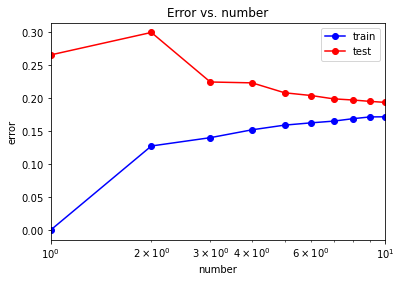

In [115]:
plt.semilogx(number_arr, train_err_knn_1, 'b-o', label = 'train')
plt.semilogx(number_arr, test_err_knn_1, 'r-o', label = 'test')
plt.xlim([np.min(number_arr), np.max(number_arr)])
plt.title('Error vs. number')
plt.xlabel('number')
plt.ylabel('error')
plt.legend()

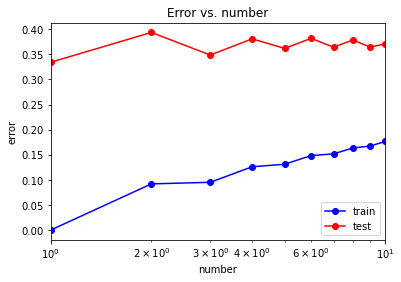

In [169]:
plt.semilogx(number_arr, train_err_knn_2, 'b-o', label = 'train')
plt.semilogx(number_arr, test_err_knn_2, 'r-o', label = 'test')
plt.xlim([np.min(number_arr), np.max(number_arr)])
plt.title('Error vs. number')
plt.xlabel('number')
plt.ylabel('error')
plt.legend()

In [135]:
train_err_knn_1

[3.6561734488684145e-05,
 0.12760045336550765,
 0.14021425176410368,
 0.1521699389419034,
 0.15922635369821944,
 0.16269971847464443,
 0.165295601623341,
 0.16898833680669811,
 0.17169390515886074,
 0.17184015209681547]

In [136]:
test_err_knn_1

[0.265657562794779,
 0.2997696610727213,
 0.22463529669847537,
 0.22331907425688274,
 0.20829220138203355,
 0.20412416365032357,
 0.19907864429088515,
 0.19732368103542833,
 0.19523966216957334,
 0.19370406932104858]

In [170]:
train_err_knn_2

[1.4947683109118087e-05,
 0.09204783258594917,
 0.09523168908819132,
 0.12614349775784753,
 0.1311509715994021,
 0.1483408071748879,
 0.15183856502242152,
 0.16352765321375187,
 0.16738415545590432,
 0.17657698056801197]

In [171]:
test_err_knn_2

[0.3341011297575957,
 0.3935505100361961,
 0.34857957661511463,
 0.380827026434134,
 0.3617418010310409,
 0.3818141932653285,
 0.36426456071076013,
 0.37852363716134696,
 0.36426456071076013,
 0.3708456729187233]

## Метод опорных векторов

In [117]:
y_train_pred = model_svm_1.predict(X_train)
y_test_pred = model_svm_1.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.18380255941499085, 0.18525830865416254)

In [164]:
y_train_pred = model_svm_2.predict(X_train)
y_test_pred = model_svm_2.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.3213893967093236, 0.3360754634199846)

In [120]:
y_train_pred = model_svm_linear_1.predict(X_train)
y_test_pred = model_svm_linear_1.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.18372943327239488, 0.18317428978830755)

In [121]:
y_train_pred = model_svm_linear_2.predict(X_train_sm)
y_test_pred = model_svm_linear_2.predict(X_test)
np.mean(y_train_sm != y_train_pred), np.mean(y_test != y_test_pred)

(0.4236472346786248, 0.3460568169353954)

In [122]:
y_train_pred = model_svm_poly_1.predict(X_train)
y_test_pred = model_svm_poly_1.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.1843875685557587, 0.18613579028189098)

In [123]:
y_train_pred = model_svm_poly_2.predict(X_train_sm)
y_test_pred = model_svm_poly_2.predict(X_test)
np.mean(y_train_sm != y_train_pred), np.mean(y_test != y_test_pred)

(0.37333333333333335, 0.3439727980695404)

## Линейный дискриминантный анализ

In [128]:
y_train_pred = model_lda_1.predict(X_train)
y_test_pred = model_lda_1.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.19842778793418647, 0.19721399583196228)

In [129]:
y_train_pred = model_lda_2.predict(X_train_sm)
y_test_pred = model_lda_2.predict(X_test)
np.mean(y_train_sm != y_train_pred), np.mean(y_test != y_test_pred)

(0.4758893871449925, 0.3851047493693101)

## Квадратичный дискриминантный анализ

In [131]:
y_train_pred = model_qda_1.predict(X_train)
y_test_pred = model_qda_1.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.716782449725777, 0.721618953603159)

In [132]:
y_train_pred = model_qda_2.predict(X_train_sm)
y_test_pred = model_qda_2.predict(X_test)
np.mean(y_train_sm != y_train_pred), np.mean(y_test != y_test_pred)

(0.6560089686098655, 0.33717231545464516)

# Метод главных компонент

Метод опорных векторов дал лучший результат. Попробуем улучшить результат с помощью метода главных компонент

In [179]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
pca.fit(X_train_sm, y_train_sm)
X_train_pca = pca.transform(X_train_sm)
X_test_pca  = pca.transform(X_test)

In [181]:
model_svm_3 = SVC()
model_svm_3.fit(X_train_pca, y_train_sm)

y_train_pred = model_svm_3.predict(X_train_pca)
y_test_pred = model_svm_3.predict(X_test_pca)
np.mean(y_train_sm != y_train_pred), np.mean(y_test != y_test_pred)

(0.39121076233183855, 0.3509926510913678)

Метод главных компонент не улучшил результаты

# Выводы

 Мы рассмотрели задачу классификации. В ней требовалось определить класс светимости звезды, зная некоторые её признаки. 
 По предоставленным данным можно было увидеть, что наиболее часто встречающийся спектральный класс - K. Спектральные классы C, D, N, O, R встречаются крайне редко. Наиболее часто встречающий спектральный подкласс - 0, а наиболее встречающийся класс светимости - V. Мы попрообвали бороться с эой несбалансированностью с помощью метода SMOTE.
 В наших данных было много пропусков. Пропуски связанные с искомым классом мы удалили, а остальные значения дополнили медианами.
 Далее для удобства работы с категориальными признаками мы их обработали. Мы применили к ним метод бинаризации.
 Далее мы приступили к разбиению данных на обучающую и тестовую выборки. Обучающая выборка - 75%, тестовая - 25%. Модель мы обучали с помощью классификатора ближайших соседей, метода опорных векторов, линейного дискриминантного анлиза и квадратичного дискриминантного анализа.
 Лучше всего себя показал метод опорных векторов с ядром rbf. В остальных случаях ошибка на обучающей выборке была больше, чем на тестовой, и обе эти ошибки были больше, чем при использовании метода опорных векторов.